In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
df = pd.read_csv('Datasets/wc-at.csv')

In [53]:
df

,Waist,AT
0,74.75,25.72
1,72.60,25.89
2,81.80,42.60
3,83.95,42.80
4,74.65,29.84
...,...,...
104,100.10,124.00
105,93.30,62.20
106,101.80,133.00
107,107.90,208.00


In [54]:
df.describe()

,Waist,AT
count,109.000000,109.000000
mean,91.901835,101.894037
std,13.559116,57.294763
min,63.500000,11.440000
25%,80.000000,50.880000
50%,90.800000,96.540000
75%,104.000000,137.000000
max,121.000000,253.000000


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109 entries, 0 to 108
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Waist   109 non-null    float64
 1   AT      109 non-null    float64
dtypes: float64(2)
memory usage: 1.8 KB


In [56]:
df.isna().sum()

Waist    0
AT       0
dtype: int64

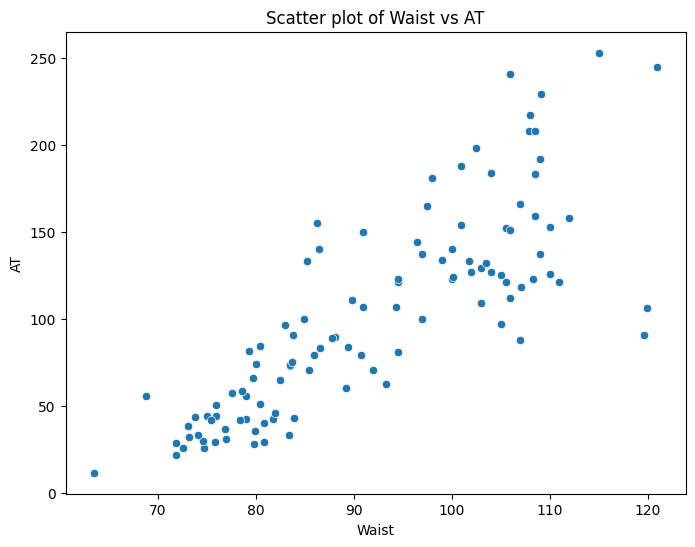

In [57]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['Waist'], y=df['AT'])
plt.title('Scatter plot of Waist vs AT')
plt.xlabel('Waist')
plt.ylabel('AT')
plt.show()

<Axes: xlabel='AT', ylabel='Count'>

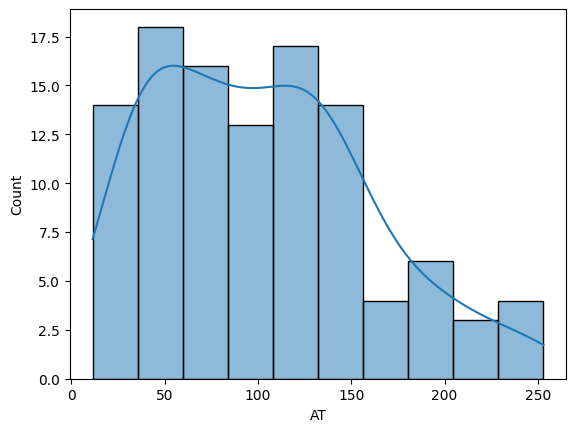

In [58]:
sns.histplot(df['AT'], bins=10, kde=True)

<Axes: xlabel='Waist', ylabel='Count'>

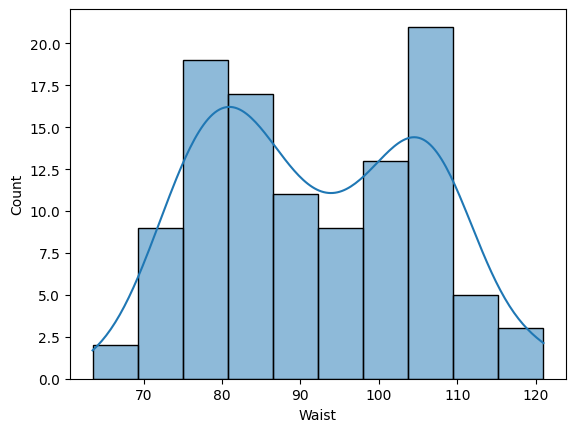

In [59]:
sns.histplot(df.Waist, bins=10, kde=True)

<Axes: xlabel='Waist', ylabel='AT'>

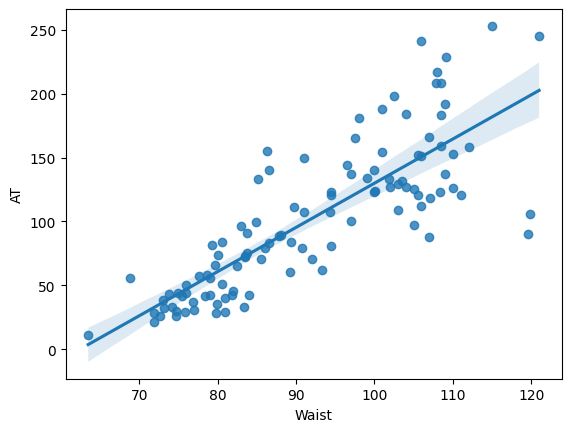

In [60]:
sns.regplot(data=df, x=df.Waist, y=df.AT)

In [61]:
df.corr()

,Waist,AT
Waist,1.000000,0.818558
AT,0.818558,1.000000


#### Y = B0 + B1(X)
#### AT = B0 + B1(WC)

In [62]:
import statsmodels.formula.api as smf
model = smf.ols('AT ~ Waist', data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     AT   R-squared:                       0.670
Model:                            OLS   Adj. R-squared:                  0.667
Method:                 Least Squares   F-statistic:                     217.3
Date:                Tue, 07 Oct 2025   Prob (F-statistic):           1.62e-27
Time:                        22:38:35   Log-Likelihood:                -534.99
No. Observations:                 109   AIC:                             1074.
Df Residuals:                     107   BIC:                             1079.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -215.9815     21.796     -9.909      0.000    -259.190    -172.773
Waist          3.4589      0.235     14.740      0.000       2.994       3.924
==============================================================================
Omnibus:                        3.960   Durbin-Watson:                   1.560
Prob(Omnibus):                  0.138   Jarque-Bera (JB):                4.596
Skew:                           0.104   Prob(JB):                        0.100
Kurtosis:                       3.984   Cond. No.                         639.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [63]:
# Coefficients
model.params

Intercept   -215.981488
Waist          3.458859
dtype: float64

In [64]:
y_pred = model.predict(df.Waist)
y_pred

0       42.568252
1       35.131704
2       66.953210
3       74.389758
4       42.222366
          ...    
104    130.250337
105    106.730093
106    136.130398
107    157.229440
108    159.304756
Length: 109, dtype: float64

In [65]:
# Actual value - Predicted value
model.resid

0     -16.848252
1      -9.241704
2     -24.353210
3     -31.589758
4     -12.382366
         ...    
104    -6.250337
105   -44.530093
106    -3.130398
107    50.770560
108    48.695244
Length: 109, dtype: float64

In [66]:
rmse_lin = np.sqrt(np.mean((np.array(df.AT) - np.array(y_pred))**2))
rmse_lin

np.float64(32.760177495755144)

Text(0, 0.5, 'Adipose Tissue')

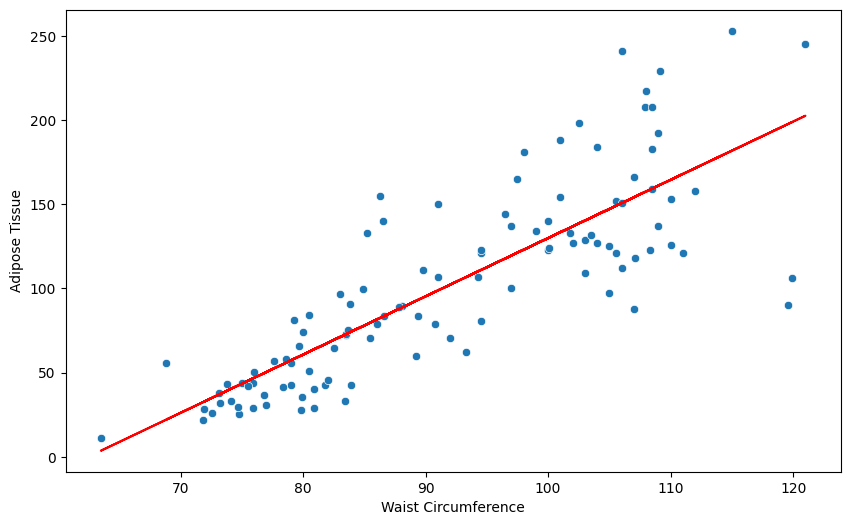

In [67]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x=df.Waist, y=df.AT)
plt.plot(df.Waist, y_pred, color='red')
plt.xlabel("Waist Circumference")
plt.ylabel("Adipose Tissue")

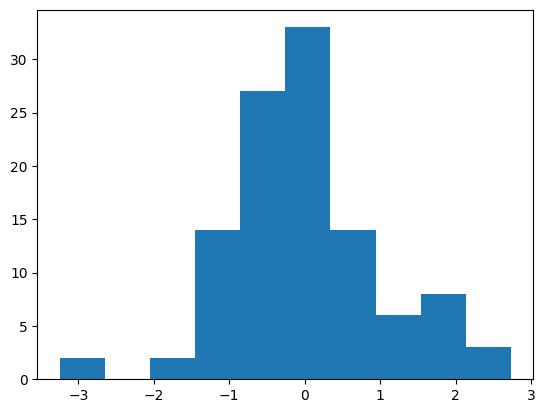

In [68]:
plt.hist(model.resid_pearson)
plt.show()

### Log Transformation
#### Y = B0 + B1*log(X)
#### AT = B0 + B1*log(WC)

In [69]:
model2 = smf.ols('AT ~np.log(Waist)', data=df).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     AT   R-squared:                       0.675
Model:                            OLS   Adj. R-squared:                  0.672
Method:                 Least Squares   F-statistic:                     222.6
Date:                Tue, 07 Oct 2025   Prob (F-statistic):           6.80e-28
Time:                        22:38:36   Log-Likelihood:                -534.11
No. Observations:                 109   AIC:                             1072.
Df Residuals:                     107   BIC:                             1078.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1328.3420     95.923    -13.848      0.000   -1518.498   -1138.186
np.log(Waist)   317.1356     21.258     14.918      0.000     274.994     359.277
==============================================================================
Omnibus:                        3.317   Durbin-Watson:                   1.599
Prob(Omnibus):                  0.190   Jarque-Bera (JB):                2.908
Skew:                           0.235   Prob(JB):                        0.234
Kurtosis:                       3.647   Cond. No.                         145.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [70]:
y_pred2 = model2.predict(pd.DataFrame(df.Waist))
y_pred2

0       39.828156
1       30.572779
2       68.410960
3       76.638769
4       39.403610
          ...    
104    132.438233
105    110.127880
106    137.778929
107    156.234559
108    157.993171
Length: 109, dtype: float64

In [71]:
model2.resid

0     -14.108156
1      -4.682779
2     -25.810960
3     -33.838769
4      -9.563610
         ...    
104    -8.438233
105   -47.927880
106    -4.778929
107    51.765441
108    50.006829
Length: 109, dtype: float64

In [72]:
rmse_log = np.sqrt(np.mean((np.array(df.AT) - np.array(y_pred2))**2))
rmse_log

np.float64(32.49688490932127)

Text(0.5, 1.0, 'WC vs AT (Log Transformation)')

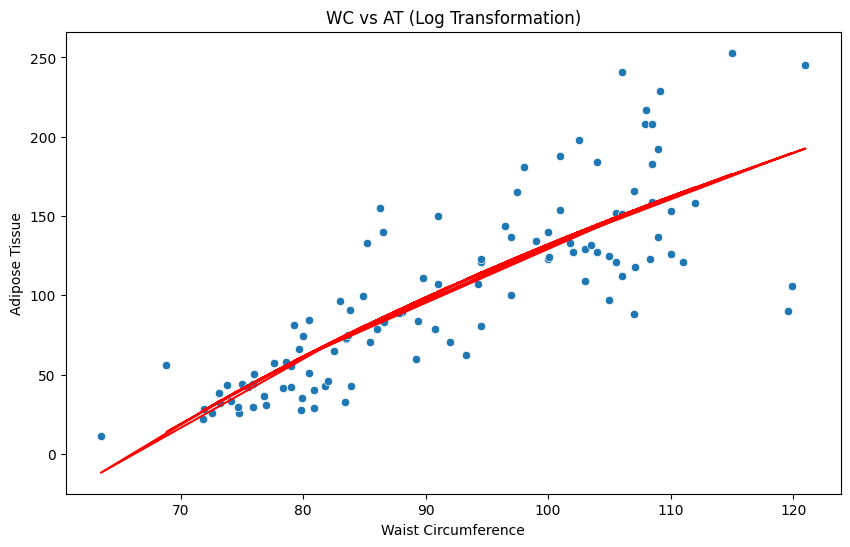

In [73]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x=df.Waist, y=df.AT)
plt.plot(df.Waist, y_pred2, color='red')
plt.xlabel("Waist Circumference")
plt.ylabel("Adipose Tissue")
plt.title("WC vs AT (Log Transformation)")

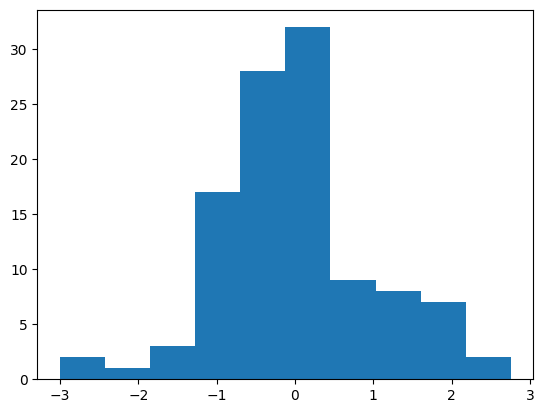

In [74]:
plt.hist(model2.resid_pearson)
plt.show()

### Exponential Transformation
#### log(Y) = B0 + B1(X)
#### Y = e^(B0 + B1(X))
#### AT = e^(B0 + B1(WC))

In [75]:
model3 = smf.ols('np.log(AT) ~ Waist', data = df).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             np.log(AT)   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     258.3
Date:                Tue, 07 Oct 2025   Prob (F-statistic):           2.68e-30
Time:                        22:38:36   Log-Likelihood:                -40.123
No. Observations:                 109   AIC:                             84.25
Df Residuals:                     107   BIC:                             89.63
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7410      0.233      3.185      0.002       0.280       1.202
Waist          0.0403      0.003     16.073      0.000       0.035       0.045
==============================================================================
Omnibus:                        2.604   Durbin-Watson:                   1.201
Prob(Omnibus):                  0.272   Jarque-Bera (JB):                2.117
Skew:                          -0.329   Prob(JB):                        0.347
Kurtosis:                       3.182   Cond. No.                         639.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [76]:
y_pred_log = model3.predict(pd.DataFrame(df.Waist))
y_pred3 = np.exp(y_pred_log)
y_pred3

0       42.516361
1       38.991601
2       56.467684
3       61.572246
4       42.345566
          ...    
104    117.953181
105     89.709020
106    126.307181
107    161.459872
108    165.406833
Length: 109, dtype: float64

In [77]:
rmse_exp = np.sqrt(np.mean((np.array(df.AT) - np.array(y_pred3))**2))
rmse_exp

np.float64(38.5290017580714)

Text(0.5, 1.0, 'WC vs AT (Exponential Transformation)')

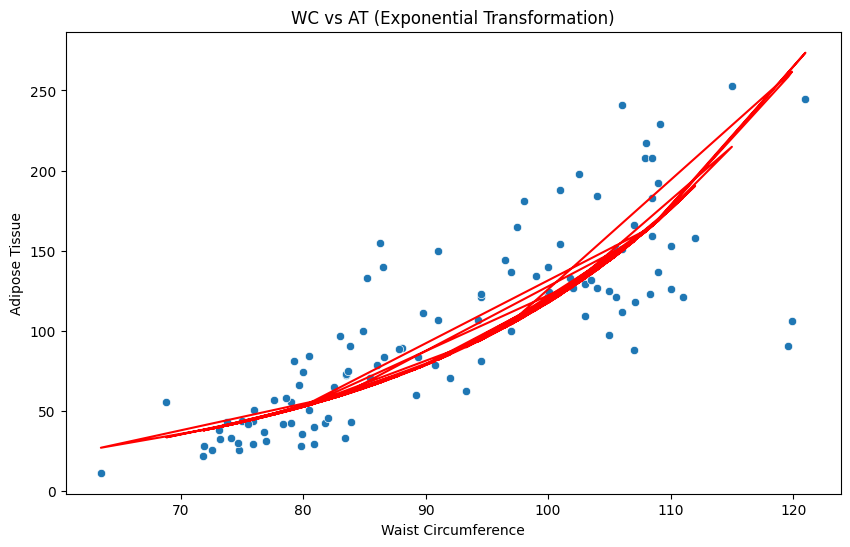

In [78]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x=df.Waist, y=df.AT)
plt.plot(df.Waist, y_pred3, color='red')
plt.xlabel("Waist Circumference")
plt.ylabel("Adipose Tissue")
plt.title("WC vs AT (Exponential Transformation)")

(array([ 2.,  1.,  6., 11., 20., 20., 25., 14.,  7.,  3.]),
 array([-2.97779536, -2.44521057, -1.91262577, -1.38004098, -0.84745619,
        -0.31487139,  0.2177134 ,  0.7502982 ,  1.28288299,  1.81546779,
         2.34805258]),
 <BarContainer object of 10 artists>)

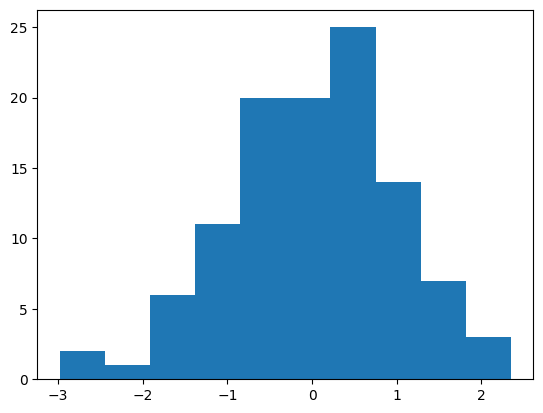

In [79]:
plt.hist(model3.resid_pearson)

### Quadratic Transformation
#### log(Y) = B0 + B1(X) + B2(X^2)
#### log(AT) = B0 + B1(WC) + B2(WC^2)

In [80]:
df['Waist_Sq'] = df.Waist * df.Waist
df.head()

,Waist,AT,Waist_Sq
0,74.75,25.72,5587.5625
1,72.60,25.89,5270.7600
2,81.80,42.60,6691.2400
3,83.95,42.80,7047.6025
4,74.65,29.84,5572.6225


In [81]:
model4 = smf.ols('np.log(AT) ~ Waist + Waist_Sq', data=df).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             np.log(AT)   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     186.8
Date:                Tue, 07 Oct 2025   Prob (F-statistic):           1.80e-35
Time:                        22:38:36   Log-Likelihood:                -24.779
No. Observations:                 109   AIC:                             55.56
Df Residuals:                     106   BIC:                             63.63
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -7.8241      1.473     -5.312      0.000     -10.744      -4.904
Waist          0.2289      0.032      7.107      0.000       0.165       0.293
Waist_Sq      -0.0010      0.000     -5.871      0.000      -0.001      -0.001
==============================================================================
Omnibus:                        0.325   Durbin-Watson:                   1.464
Prob(Omnibus):                  0.850   Jarque-Bera (JB):                0.271
Skew:                           0.119   Prob(JB):                        0.873
Kurtosis:                       2.949   Cond. No.                     4.49e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.49e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [82]:
pred_quad = model4.predict(df)
y_pred4 = np.exp(pred_quad)

In [83]:
rmse_quad = np.sqrt(np.mean((np.array(df.AT) - np.array(y_pred4))**2))
rmse_quad

np.float64(32.24444782776227)

Text(0.5, 1.0, 'WC vs AT (Quadratic Transformation)')

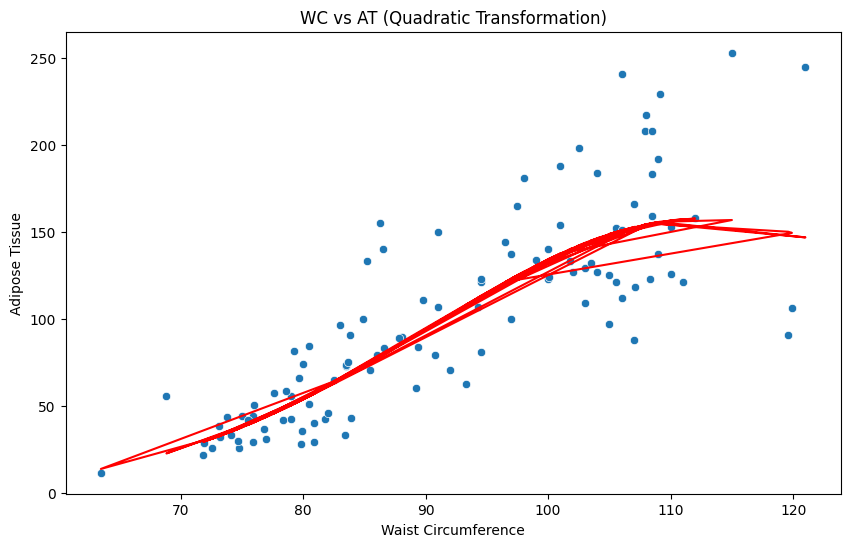

In [84]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x=df.Waist, y=df.AT)
plt.plot(df.Waist, y_pred4, color='red')
plt.xlabel("Waist Circumference")
plt.ylabel("Adipose Tissue")
plt.title("WC vs AT (Quadratic Transformation)")

(array([ 5.,  5., 16., 19., 27., 15., 14.,  5.,  2.,  1.]),
 array([-2.26761195, -1.74678239, -1.22595282, -0.70512326, -0.1842937 ,
         0.33653586,  0.85736542,  1.37819499,  1.89902455,  2.41985411,
         2.94068367]),
 <BarContainer object of 10 artists>)

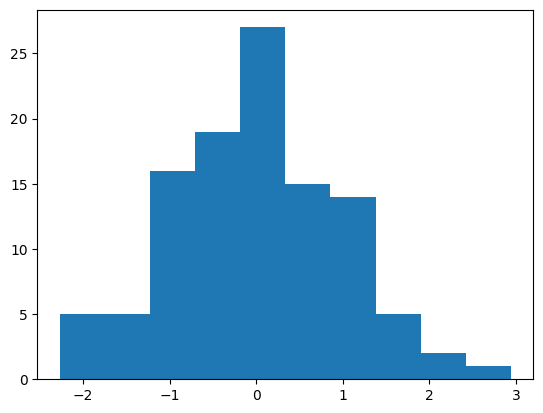

In [85]:
plt.hist(model4.resid_pearson)

Text(0, 0.5, 'Standardized Residual')

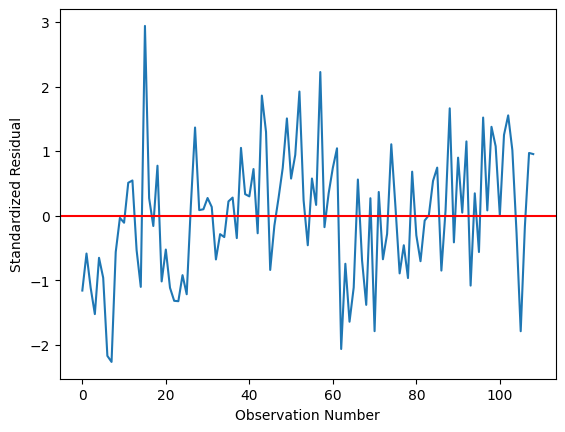

In [86]:
plt.plot(np.arange(109), model4.resid_pearson)
plt.axhline(y=0, color='red')
plt.xlabel("Observation Number")
plt.ylabel("Standardized Residual")

Text(0, 0.5, 'Standardized Residual')

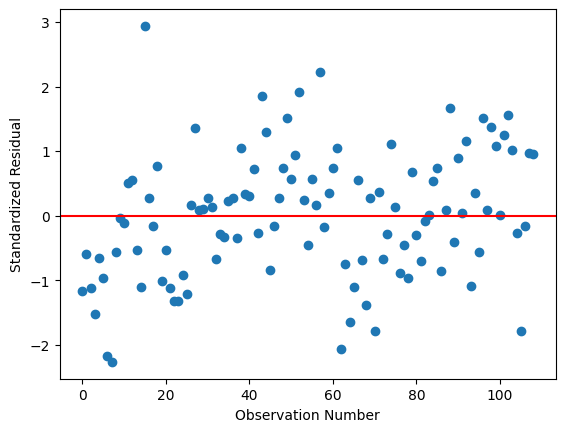

In [87]:
plt.scatter(np.arange(109), model4.resid_pearson)
plt.axhline(y=0, color='red')
plt.xlabel("Observation Number")
plt.ylabel("Standardized Residual")

In [88]:
data = {'Model' : pd.Series(['rmse_lin', 'rmse_log', 'rmse_exp', 'rmse_quad']),
       'RMSE_Values' : pd.Series([rmse_lin, rmse_log, rmse_exp, rmse_quad]),
       'R_square' : pd.Series([model.rsquared, model2.rsquared, model3.rsquared, model4.rsquared])}

table = pd.DataFrame(data)

In [89]:
table

,Model,RMSE_Values,R_square
0,rmse_lin,32.760177,0.670037
1,rmse_log,32.496885,0.675319
2,rmse_exp,38.529002,0.707114
3,rmse_quad,32.244448,0.778982
